# Set Difference

Let A = {1,2,3}, B = {2,3,4}  
The set that we are looking for is $A\cap B = \{1\}$, which is encoded as 100

## Create Quantum Circuit

In [1]:
import qiskit
from qiskit import *
from math import pi
from qiskit.tools.visualization import plot_histogram # For plotting results
from qiskit.tools.monitor import job_monitor # Get queue information using a job monitor

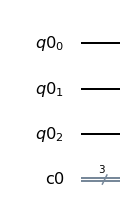

In [2]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)

qc.draw(output='mpl')

## Step 1: Initalization

In [3]:
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])

## Step 2: Grover Iteration

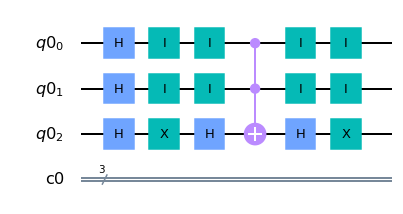

In [4]:
# Apply Oracle
qc.id(qr[0])
qc.id(qr[1])
qc.x(qr[2])
qc.id(qr[0])
qc.h(qr[2])
qc.id(qr[1])
qc.ccx(qr[0],qr[1],qr[2])
qc.id(qr[0])
qc.id(qr[1])
qc.h(qr[2])
qc.id(qr[0])
qc.id(qr[1])
qc.x(qr[2])

qc.draw(output='mpl')

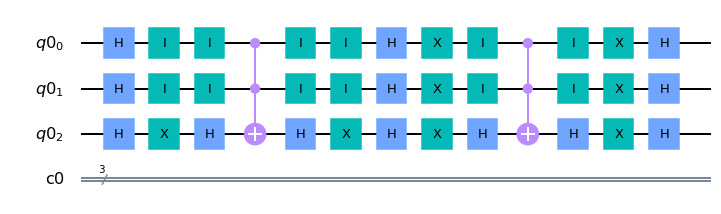

In [5]:
# Apply Grover Diffusion Operator
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[2])
qc.id(qr[0])
qc.id(qr[1])
qc.h(qr[2])
qc.ccx(qr[0],qr[1],qr[2])
qc.id(qr[0])
qc.id(qr[1])
qc.h(qr[2])
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[2])
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])

qc.draw(output='mpl')

### Repeat again

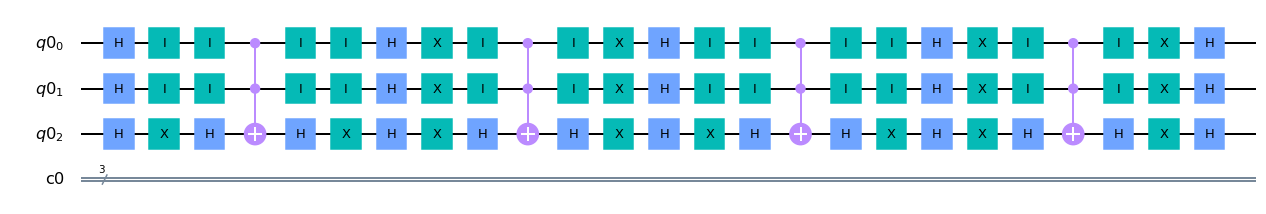

In [6]:
# Apply Oracle
qc.id(qr[0])
qc.id(qr[1])
qc.x(qr[2])
qc.id(qr[0])
qc.h(qr[2])
qc.id(qr[1])
qc.ccx(qr[0],qr[1],qr[2])
qc.id(qr[0])
qc.id(qr[1])
qc.h(qr[2])
qc.id(qr[0])
qc.id(qr[1])
qc.x(qr[2])

# Apply Grover Diffusion Operator
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[2])
qc.id(qr[0])
qc.id(qr[1])
qc.h(qr[2])
qc.ccx(qr[0],qr[1],qr[2])
qc.id(qr[0])
qc.id(qr[1])
qc.h(qr[2])
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[2])
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])

qc.draw(output='mpl')

## Step 4: Apply X Gates

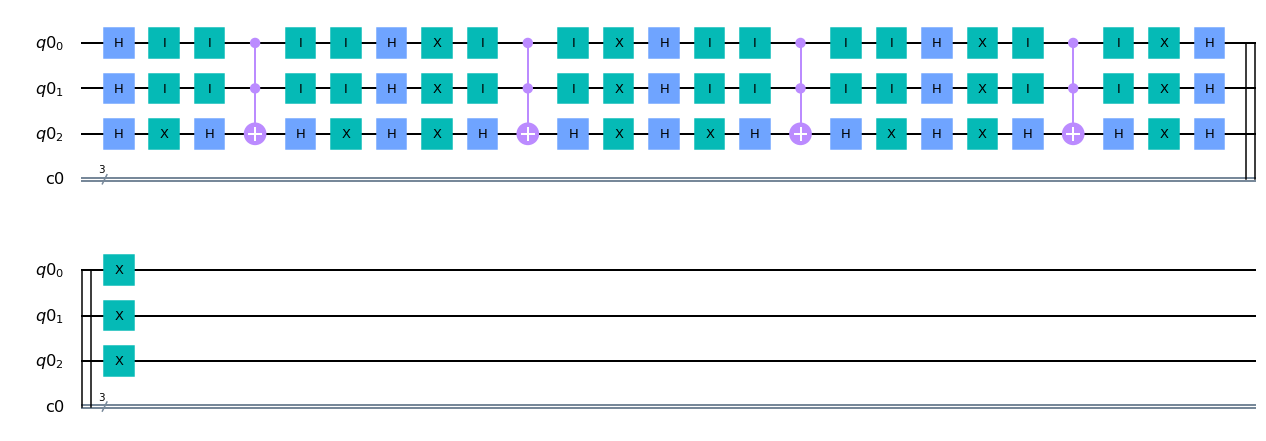

In [7]:
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[2])

qc.draw(output='mpl')

## Step 3: Measure Qubits

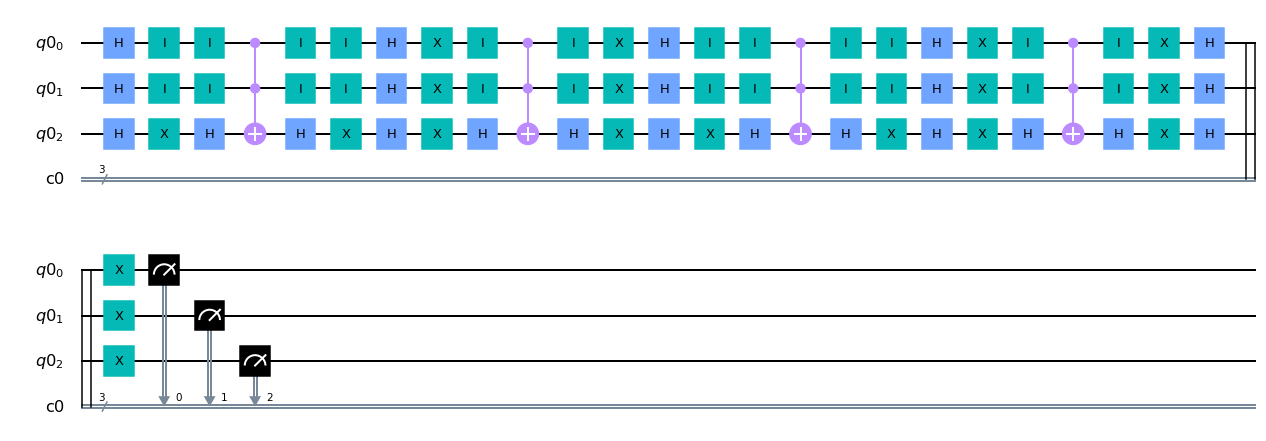

In [8]:
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.measure(qr[2], cr[2])

qc.draw(output='mpl')

# Simulation on IBM's quantum computers

### Use API to get access to IBM servers

In [9]:
IBMQ.save_account('5f580f61b258cb044edd655114ac1c91ce0311107bd43c02f566a7e9fd21357a04f524a04aa60834c8d9929c34299da0a2ee6c1cf6b796ee685018a93126175e')
IBMQ.load_account()

configrc.store_credentials:WARNING:2020-08-26 09:46:09,590: Credentials already present. Set overwrite=True to overwrite.
/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### Quantum Simulator

Job Status: job has successfully run


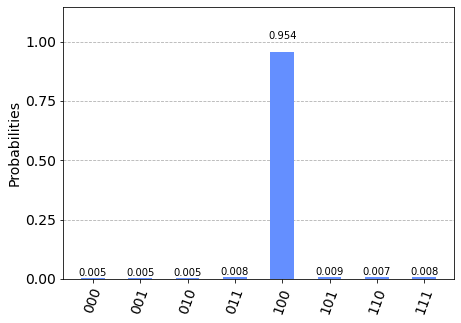

In [10]:
# Add job to pending list
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_qasm_simulator')
job = execute(qc, backend=qcomp, shots=1024)

# Get queue information using a job monitor
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()

# Plot results
plot_histogram(result.get_counts(qc))

### ibmq-london

Job Status: job has successfully run


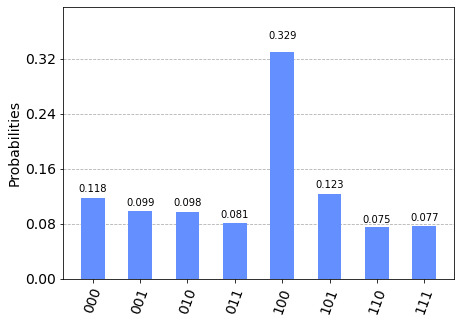

In [11]:
# Add job to pending list
provider = IBMQ.get_provider(hub='ibm-q')
qcomp = provider.get_backend('ibmq_london')
job = execute(qc, backend=qcomp, shots=1024)

job_monitor(job)
result = job.result()

# Plot results
plot_histogram(result.get_counts(qc))

### ibmq-burlington

In [ ]:
# Add job to pending list
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_burlington')
job = execute(qc, backend=qcomp, shots=1024)

# Get queue information using a job monitor
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()

# Plot results
plot_histogram(result.get_counts(qc))

Job Status: job is queued (7)     

### ibmq-vigo

In [ ]:
# Add job to pending list
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_vigo')
job = execute(qc, backend=qcomp, shots=1024)

# Get queue information using a job monitor
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()

# Plot results
plot_histogram(result.get_counts(qc))

### ibmq-oursense

In [ ]:
# Add job to pending list
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_ourense')
job = execute(qc, backend=qcomp, shots=1024)

# Get queue information using a job monitor
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()

# Plot results
plot_histogram(result.get_counts(qc))

### ibmqx2

In [ ]:
# Add job to pending list
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmqx2')
job = execute(qc, backend=qcomp, shots=1024)

# Get queue information using a job monitor
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()

# Plot results
plot_histogram(result.get_counts(qc))